# Distribution Plots

In [3]:
import seaborn as sns
# check out http://seaborn.pydata.org/ for more information

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


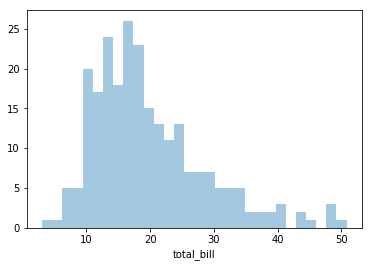

In [12]:
# see distribution of one column
# kde is a smoothing curve
# bins is granuity
# keyword for underlying 
sns.distplot(tips['total_bill'], kde=False, bins=30)


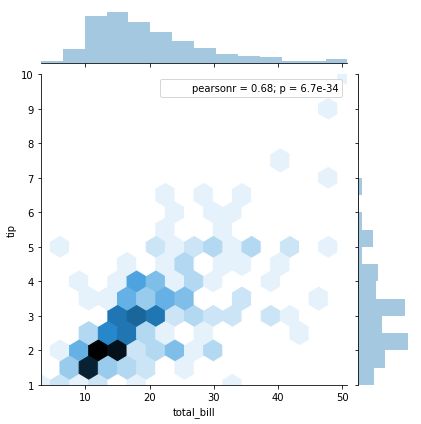

In [19]:
# kind has kde, scatter, hex, 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

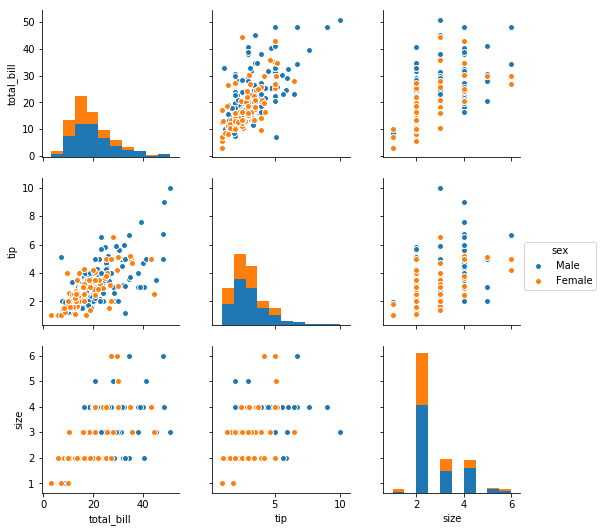

In [21]:
# hue can be used to categorize with field in dataframe
sns.pairplot(tips,hue='sex')

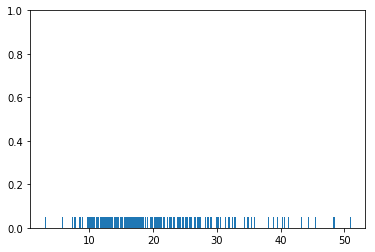

In [23]:
sns.rugplot(tips['total_bill'])

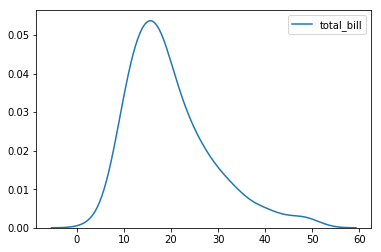

In [24]:
sns.kdeplot(tips['total_bill'])

(0, 1)

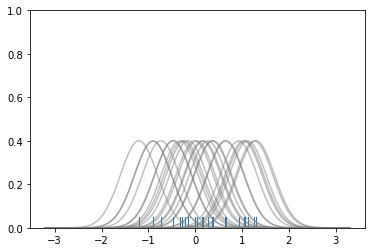

In [27]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)



Text(0.5,0.98,'Sum of the Basis Functions')

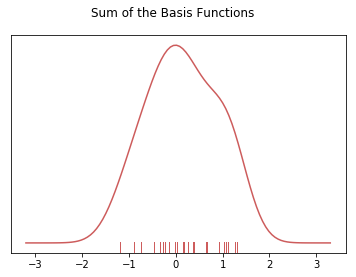

In [31]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

#  sb plots on top of matplotlib, can also specfy ax= for subplots

# Categorical Plots

In [33]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


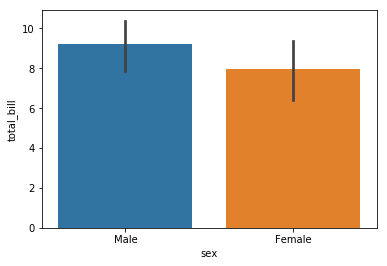

In [39]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

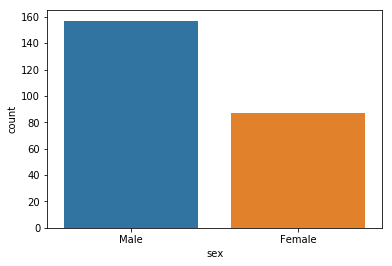

In [45]:
sns.countplot(x='sex',data=tips)

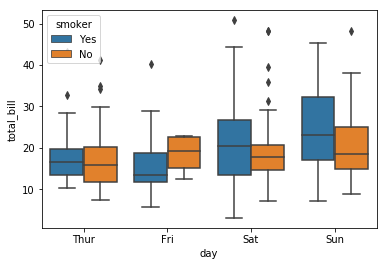

In [46]:
# hue once again splits 
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

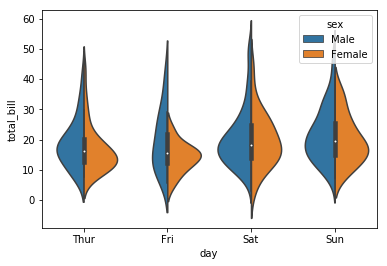

In [48]:
# split combines the distribution together
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split='true')

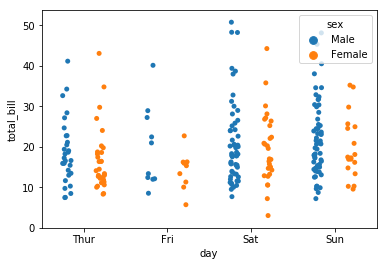

In [53]:
# overlaps unless you use jitter
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

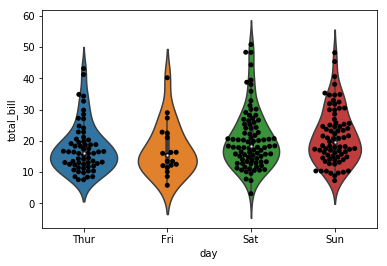

In [56]:
# doesn't scale well, points goes way too wide
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
sns.violinplot(x='day',y='total_bill',data=tips)

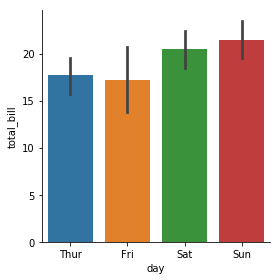

In [57]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

# Matrix Plots

In [60]:
flights = sns.load_dataset('flights')

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [65]:
tc = tips.corr()

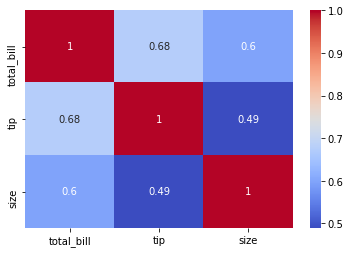

In [68]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [71]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

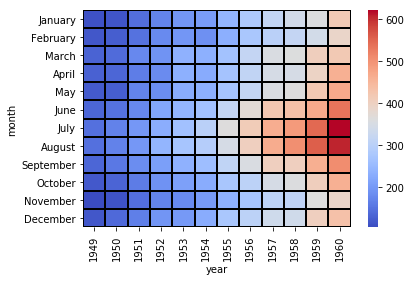

In [76]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidths=1)

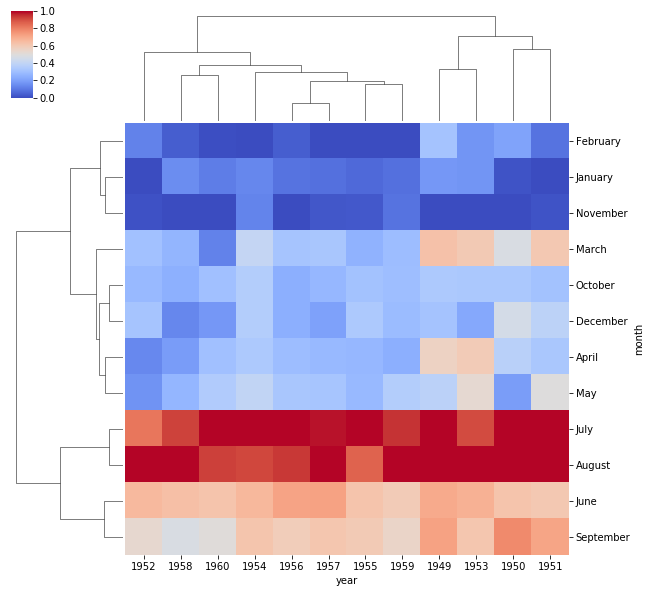

In [79]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

# Grids

In [80]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/Users/seanhsu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


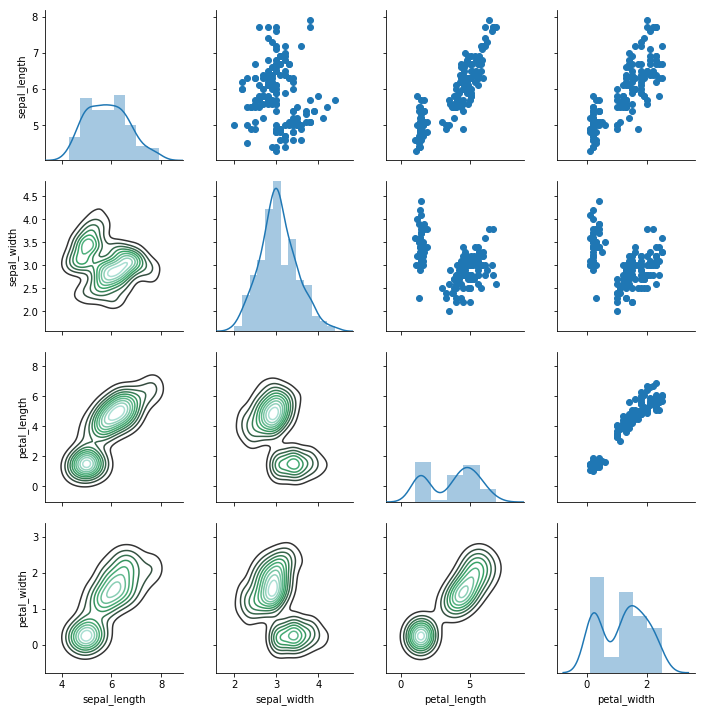

In [87]:
g = sns.PairGrid(iris)
# g.map(plt.scatter)
 
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

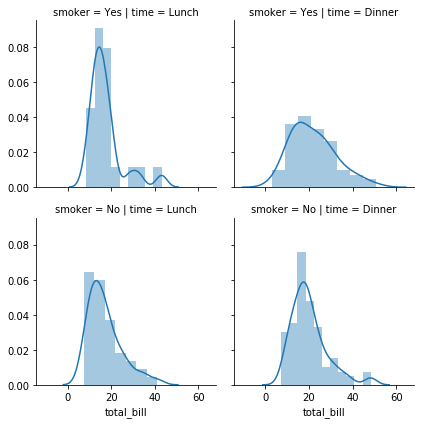

In [90]:
# you can use facet grid to categorize
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')
# if you need 2 dimension need to specify both
# g.map(plt.scatter,'total_bill','tips')

# Regression Plots

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


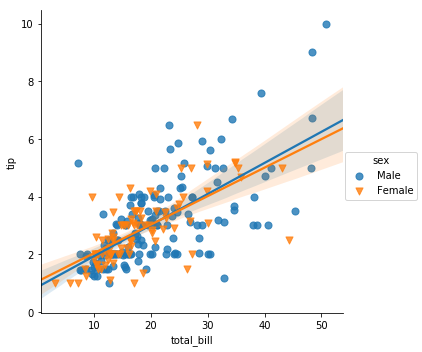

In [93]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':50})

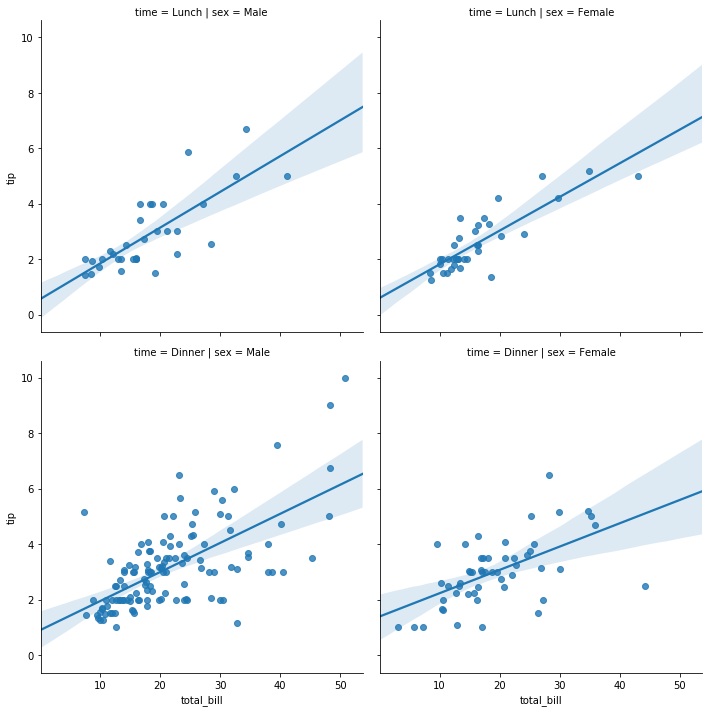

In [95]:
# like facet grid call
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

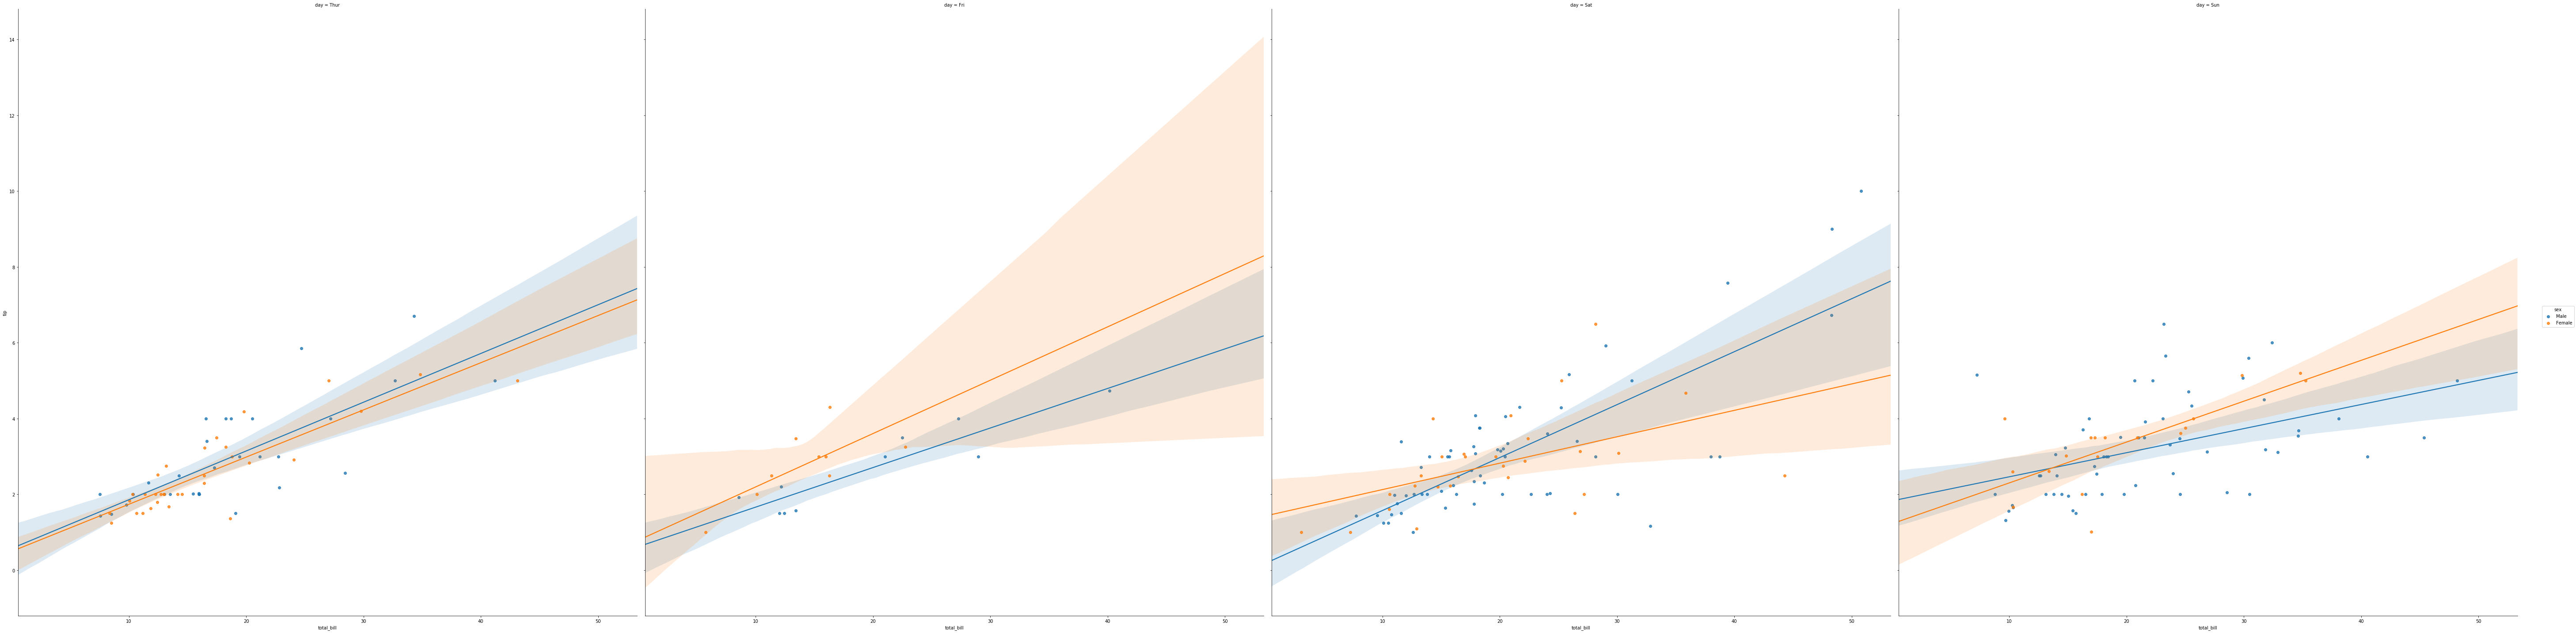

In [102]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=1,size=20)

# Style and Color

In [103]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


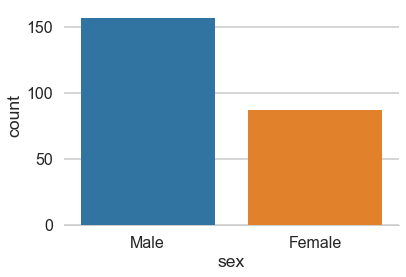

In [118]:
# can set size using matplotlib
#plt.figure(figsize=(12,3))
sns.set_context('poster',font_scale=1)
# changes background grid
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
# get rid of spines
sns.despine(left=True)


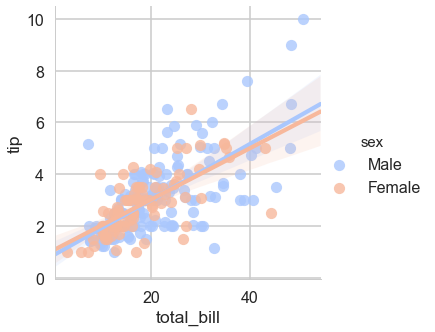

In [120]:
plt.figure(figsize=(12,3))
# for colors go check out matplotlib 
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')